## Machine Learning Analysis
This notebook performs Machine Learning analysis on the Flipkart product data directly from MySQL database.

## Retrieve Data from MySQL

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sqlalchemy import create_engine
from urllib.parse import quote_plus
import warnings
warnings.filterwarnings('ignore')

plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette('husl')

print("Libraries imported successfully!")
     

Libraries imported successfully!


In [4]:
username = 'root'
password = '8181'
host = 'localhost'
database = 'flipkart'

encoded_password = quote_plus(password)

engine = create_engine(f"mysql+mysqlconnector://{username}:{encoded_password}@{host}/{database}")

query = "SELECT * FROM flipkart_products"
df = pd.read_sql(query, engine)

print(f"Data loaded successfully from MySQL!")
print(f"Shape: {df.shape}")
df.head()

Data loaded successfully from MySQL!
Shape: (827, 5)


,Product Name,Product Category,Price,Rating,Review
0,Apple AirPods Pro (2nd generation) with MagSaf...,AirPods,16990.0,4.6,35792
1,"Apple AirPods 4 Wireless Earbuds, Personalised...",AirPods,10999.0,4.4,2935
2,Apple AirPods(2nd gen) with Charging Case Blue...,AirPods,7999.0,4.5,155779
3,Apple AirPods 4 Wireless Earbuds with Active N...,AirPods,16900.0,4.4,1694
4,Apple AirPods Pro 3 Bluetooth,AirPods,25900.0,4.6,597


In [5]:
print("Missing Values:")
print(df.isnull().sum())
print(f"\nTotal rows with missing values: {df.isnull().any(axis=1).sum()}")
     

Missing Values:
Product Name        0
Product Category    0
Price               2
Rating              0
Review              0
dtype: int64

Total rows with missing values: 2


In [6]:
df['Price'] = df['Price'].fillna(df['Price'].median())

df['Rating'] = df['Rating'].fillna(0)

df['Review'] = df['Review'].fillna(0)

df = df.dropna(subset=['Product Name', 'Product Category'])

print(f"After handling missing values:")
print(f"Shape: {df.shape}")
print(f"\nMissing values remaining:")
print(df.isnull().sum())
     

After handling missing values:
Shape: (827, 5)

Missing values remaining:
Product Name        0
Product Category    0
Price               0
Rating              0
Review              0
dtype: int64


In [7]:
print("\nUnique Product Categories:")
print(df['Product Category'].unique())
print(f"\nTotal categories: {df['Product Category'].nunique()}")


Unique Product Categories:
['AirPods' 'Smart Watches' 'Laptops' 'Smart TV' 'Mixer Grinders'
 'Air Coolers' 'Refrigerators' 'Washing Machines']

Total categories: 8


In [8]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 827 entries, 0 to 826
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Product Name      827 non-null    object 
 1   Product Category  827 non-null    object 
 2   Price             827 non-null    float64
 3   Rating            827 non-null    float64
 4   Review            827 non-null    int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 32.4+ KB


# Unsupervised Learning

## K-Means Clustering

In [9]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

X = df[['Price', 'Rating', 'Review']].copy()

X = X.fillna(0)

print("Features selected for clustering:")
print(X.head())
print(f"\nAny NaN values? {X.isnull().any().any()}")

Features selected for clustering:
     Price  Rating  Review
0  16990.0     4.6   35792
1  10999.0     4.4    2935
2   7999.0     4.5  155779
3  16900.0     4.4    1694
4  25900.0     4.6     597

Any NaN values? False


In [10]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print("Features scaled successfully!")
print(f"Shape: {X_scaled.shape}")
     

Features scaled successfully!
Shape: (827, 3)


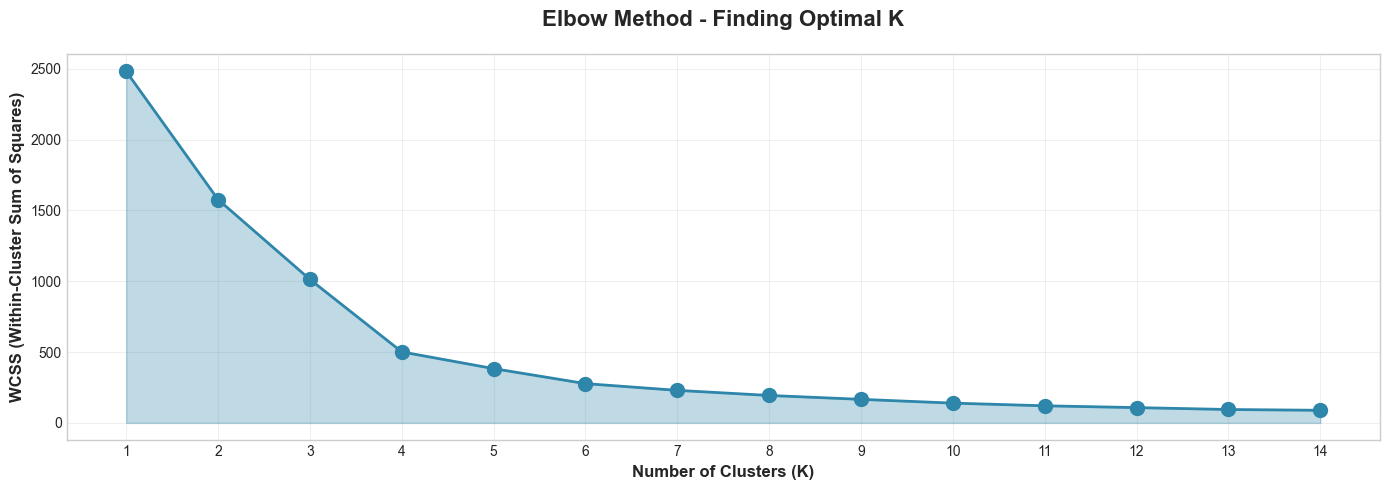

In [11]:
wcss = []

for i in range(1, 15):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(14, 5))
plt.plot(range(1, 15), wcss, marker='o', markersize=10, linewidth=2, color='#2E86AB')
plt.fill_between(range(1, 15), wcss, alpha=0.3, color='#2E86AB')
plt.title('Elbow Method - Finding Optimal K', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Number of Clusters (K)', fontsize=12, fontweight='bold')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)', fontsize=12, fontweight='bold')
plt.xticks(range(1, 15))
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [12]:

kmeans = KMeans(
    n_clusters=3,
    init='k-means++',
    max_iter=300,
    n_init=10,
    random_state=42
)

pred_y = kmeans.fit_predict(X_scaled)

df['Cluster'] = pred_y + 1 

print("K-Means clustering completed!")
print(f"\nCluster distribution:")
print(df['Cluster'].value_counts().sort_index())

K-Means clustering completed!

Cluster distribution:
Cluster
1    605
2    175
3     47
Name: count, dtype: int64


In [13]:

df.head(10)

,Product Name,Product Category,Price,Rating,Review,Cluster
0,Apple AirPods Pro (2nd generation) with MagSaf...,AirPods,16990.0,4.6,35792,1
1,"Apple AirPods 4 Wireless Earbuds, Personalised...",AirPods,10999.0,4.4,2935,1
2,Apple AirPods(2nd gen) with Charging Case Blue...,AirPods,7999.0,4.5,155779,3
3,Apple AirPods 4 Wireless Earbuds with Active N...,AirPods,16900.0,4.4,1694,1
4,Apple AirPods Pro 3 Bluetooth,AirPods,25900.0,4.6,597,1
5,Apple AirPods (3rd generation) with Lightning ...,AirPods,10999.0,4.3,1703,1
6,Apple New AirPods Max Bluetooth,AirPods,59900.0,4.4,571,1
7,Apple AirPods Pro (2nd generation) Bluetooth,AirPods,24990.0,4.5,24,1
8,Apple AirPods Pro (2nd generation) with Active...,AirPods,26600.0,4.6,11899,1
9,Apple Airpods Pro With Wireless Charging Case ...,AirPods,22400.0,4.5,64401,1


In [14]:
cluster_analysis = df.groupby('Cluster')[['Price', 'Rating', 'Review']].mean()
print("\nCluster Analysis (Mean Values):")
cluster_analysis
     


Cluster Analysis (Mean Values):


,Price,Rating,Review
Cluster,,,
1,16199.571901,4.095537,8762.480992
2,3020.502857,0.016000,0.057143
3,11097.680851,4.263830,140541.680851


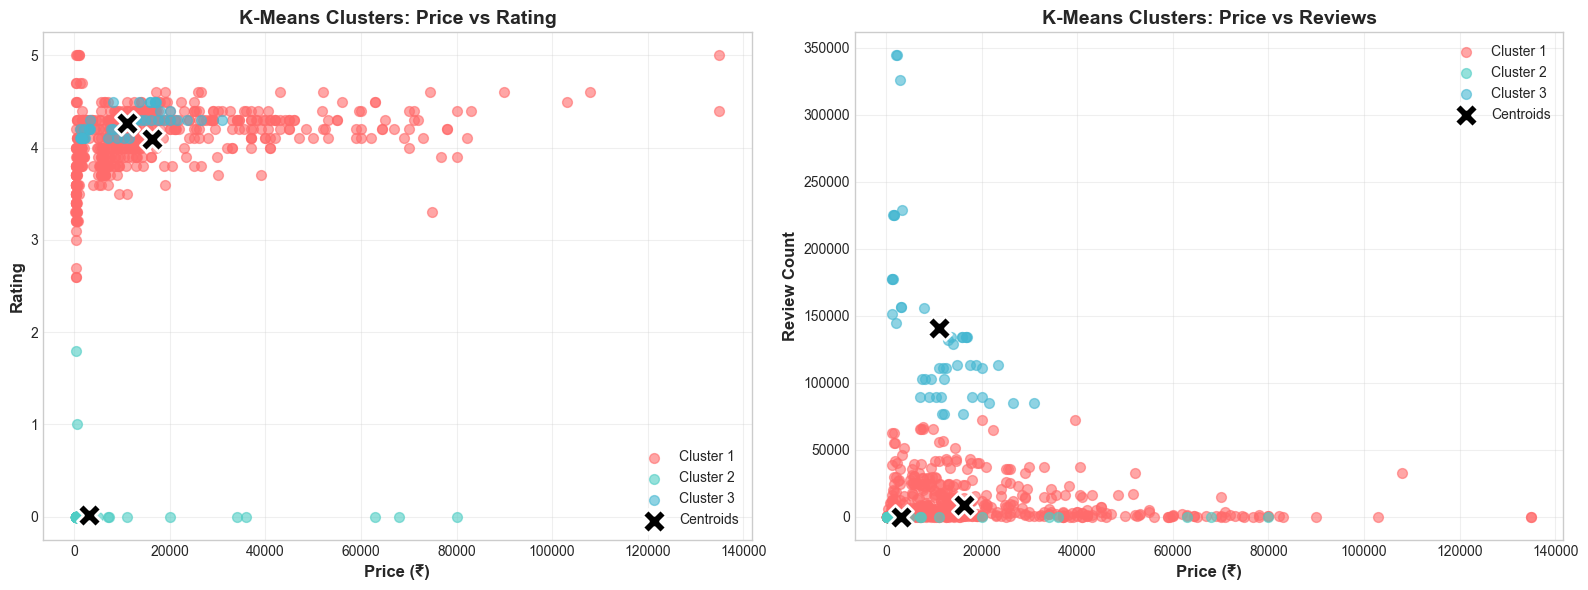

In [15]:
labels = kmeans.fit_predict(X_scaled)

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

colors = ['#FF6B6B', '#4ECDC4', '#45B7D1']
for i, color in enumerate(colors):
    mask = labels == i
    axes[0].scatter(X.values[mask, 0], X.values[mask, 1], c=color, label=f'Cluster {i+1}', alpha=0.6, s=50)

centers_original = scaler.inverse_transform(kmeans.cluster_centers_)
axes[0].scatter(centers_original[:, 0], centers_original[:, 1], s=300, c='black', marker='X', edgecolors='white', linewidths=2, label='Centroids')

axes[0].set_xlabel('Price (₹)', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Rating', fontsize=12, fontweight='bold')
axes[0].set_title('K-Means Clusters: Price vs Rating', fontsize=14, fontweight='bold')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

for i, color in enumerate(colors):
    mask = labels == i
    axes[1].scatter(X.values[mask, 0], X.values[mask, 2], c=color, label=f'Cluster {i+1}', alpha=0.6, s=50)

axes[1].scatter(centers_original[:, 0], centers_original[:, 2], s=300, c='black', marker='X', edgecolors='white', linewidths=2, label='Centroids')

axes[1].set_xlabel('Price (₹)', fontsize=12, fontweight='bold')
axes[1].set_ylabel('Review Count', fontsize=12, fontweight='bold')
axes[1].set_title('K-Means Clusters: Price vs Reviews', fontsize=14, fontweight='bold')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()
     

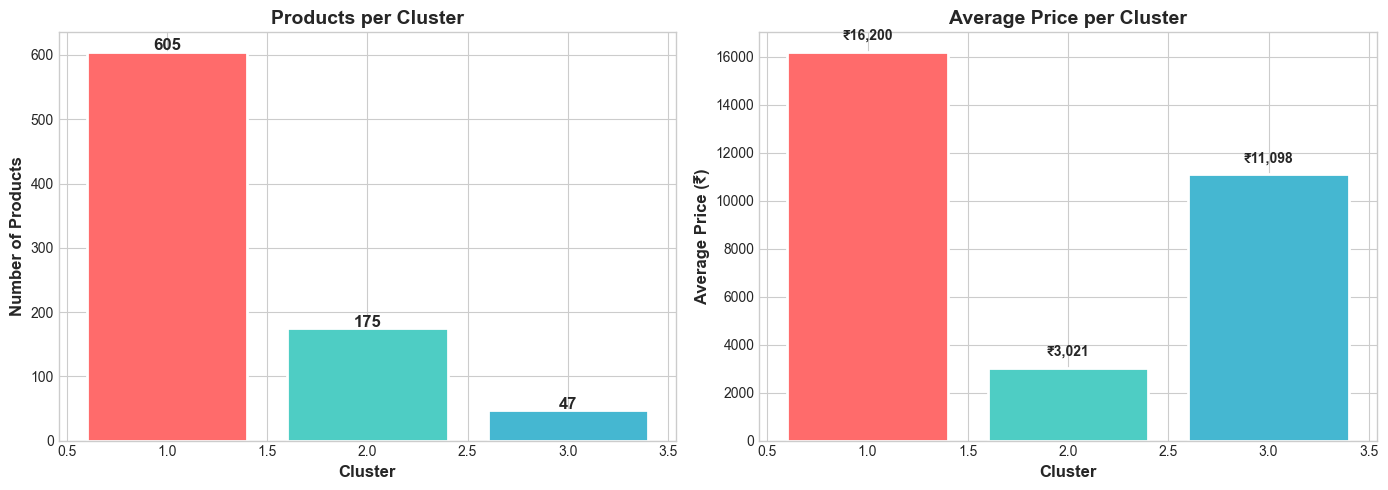

In [16]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

cluster_counts = df['Cluster'].value_counts().sort_index()
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1']
bars = axes[0].bar(cluster_counts.index, cluster_counts.values, color=colors, edgecolor='white', linewidth=2)

for bar, value in zip(bars, cluster_counts.values):
    axes[0].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 2, str(value), 
                 ha='center', fontweight='bold', fontsize=12)

axes[0].set_xlabel('Cluster', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Number of Products', fontsize=12, fontweight='bold')
axes[0].set_title('Products per Cluster', fontsize=14, fontweight='bold')

avg_price = df.groupby('Cluster')['Price'].mean()
bars2 = axes[1].bar(avg_price.index, avg_price.values, color=colors, edgecolor='white', linewidth=2)

for bar, value in zip(bars2, avg_price.values):
    axes[1].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 500, f'₹{value:,.0f}', 
                 ha='center', fontweight='bold', fontsize=10)

axes[1].set_xlabel('Cluster', fontsize=12, fontweight='bold')
axes[1].set_ylabel('Average Price (₹)', fontsize=12, fontweight='bold')
axes[1].set_title('Average Price per Cluster', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

In [17]:

df.to_sql(
    name='flipkart_products_clustered',
    con=engine,
    if_exists='replace',
    index=False
)
print("\n Clustered data saved to MySQL table: flipkart_products_clustered")


 Clustered data saved to MySQL table: flipkart_products_clustered


# Supervised Learning

## Product Category Classification

In [18]:
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

print("All ML libraries imported!")

All ML libraries imported!


In [19]:
df_class = df.drop(columns=['Cluster'], errors='ignore').copy()

X = df_class[['Product Name', 'Price', 'Rating', 'Review']].copy()
y = df_class['Product Category']

X['Price'] = X['Price'].fillna(X['Price'].median())
X['Rating'] = X['Rating'].fillna(0)
X['Review'] = X['Review'].fillna(0)
X['Product Name'] = X['Product Name'].fillna('')

print("Features:")
print(X.columns.tolist())
print(f"\nTarget: Product Category")
print(f"Classes: {y.nunique()}")
print(f"\nAny NaN in X? {X.isnull().any().any()}")
     

Features:
['Product Name', 'Price', 'Rating', 'Review']

Target: Product Category
Classes: 8

Any NaN in X? False


In [20]:
le = LabelEncoder()
y_encoded = le.fit_transform(y)

print("Label Encoding:")
for i, label in enumerate(le.classes_):
    print(f"  {i}: {label}")
     

Label Encoding:
  0: Air Coolers
  1: AirPods
  2: Laptops
  3: Mixer Grinders
  4: Refrigerators
  5: Smart TV
  6: Smart Watches
  7: Washing Machines


In [21]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

print(f"Training set size: {len(X_train)}")
print(f"Test set size: {len(X_test)}")
     

Training set size: 661
Test set size: 166


In [22]:
preprocessor = ColumnTransformer(
    transformers=[
        ('text', TfidfVectorizer(
            max_features=5000,
            ngram_range=(1, 2),
            stop_words='english'
        ), 'Product Name'),
        ('num', StandardScaler(), ['Price', 'Rating', 'Review'])
    ]
)

print("Preprocessor configured!")

Preprocessor configured!


In [23]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "SVM": SVC(kernel='rbf'),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=200, random_state=42),
    "XGBoost": XGBClassifier(
        objective='multi:softmax',
        num_class=len(set(y_encoded)),
        eval_metric='mlogloss',
        random_state=42
    )
}

print(f"Models to evaluate: {list(models.keys())}")

Models to evaluate: ['Logistic Regression', 'SVM', 'Decision Tree', 'Random Forest', 'XGBoost']


In [25]:
results = []
for name, model in models.items():
    print(f"Training {name}...")
    
    pipeline = ImbPipeline(steps=[
        ('preprocess', preprocessor),
        ('smote', SMOTE(random_state=42)),
        ('model', model)
    ])
    
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    
    results.append({
        "Model": name,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred, average='weighted'),
        "Recall": recall_score(y_test, y_pred, average='weighted'),
        "F1 Score": f1_score(y_test, y_pred, average='weighted')
    })

results_df = pd.DataFrame(results)
print("\n" + "="*70)
print("MODEL COMPARISON RESULTS")
print("="*70)
print(results_df.to_string(index=False))

Training Logistic Regression...
Training SVM...
Training Decision Tree...
Training Random Forest...
Training XGBoost...

MODEL COMPARISON RESULTS
              Model  Accuracy  Precision   Recall  F1 Score
Logistic Regression  1.000000   1.000000 1.000000  1.000000
                SVM  0.987952   0.988568 0.987952  0.987887
      Decision Tree  0.993976   0.994311 0.993976  0.993992
      Random Forest  0.993976   0.994184 0.993976  0.993965
            XGBoost  0.993976   0.994184 0.993976  0.993965


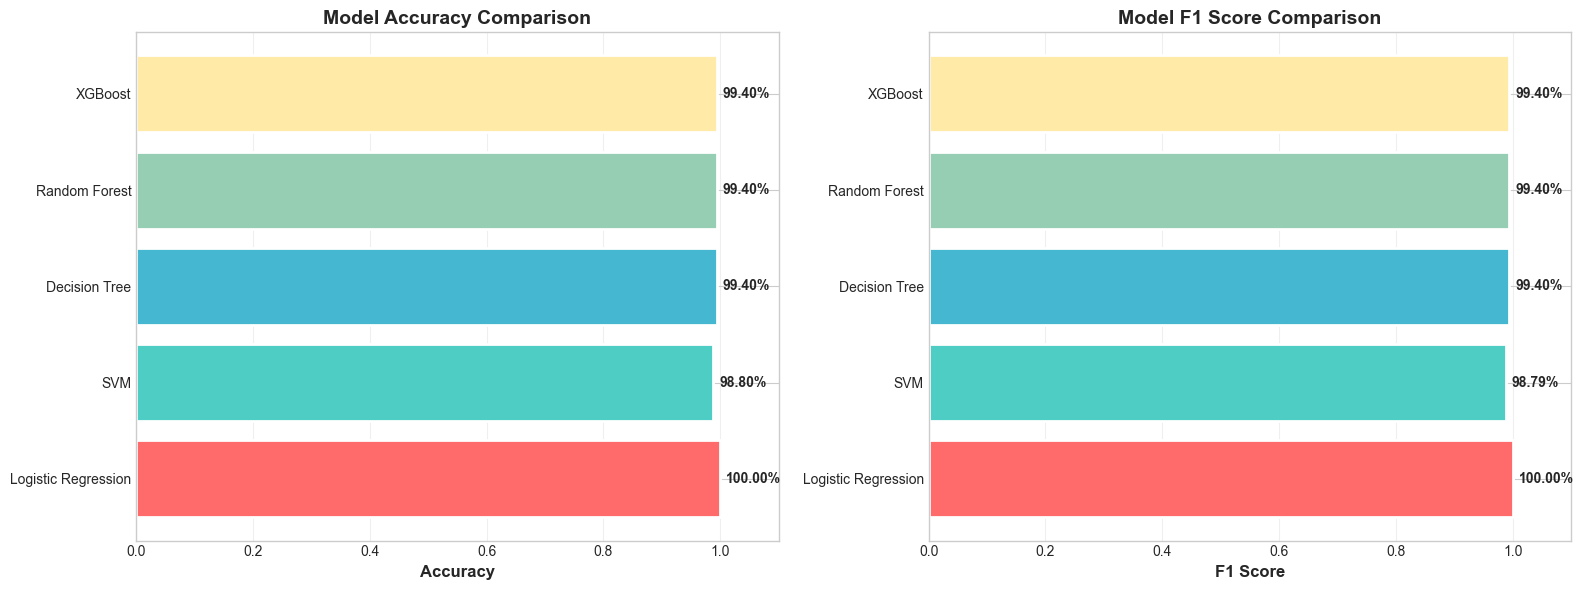

In [26]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4', '#FFEAA7']
bars1 = axes[0].barh(results_df['Model'], results_df['Accuracy'], color=colors, edgecolor='white', linewidth=2)

for bar, value in zip(bars1, results_df['Accuracy']):
    axes[0].text(value + 0.01, bar.get_y() + bar.get_height()/2, f'{value:.2%}', 
                 va='center', fontweight='bold', fontsize=10)

axes[0].set_xlabel('Accuracy', fontsize=12, fontweight='bold')
axes[0].set_title('Model Accuracy Comparison', fontsize=14, fontweight='bold')
axes[0].set_xlim(0, 1.1)
axes[0].grid(True, alpha=0.3, axis='x')

bars2 = axes[1].barh(results_df['Model'], results_df['F1 Score'], color=colors, edgecolor='white', linewidth=2)

for bar, value in zip(bars2, results_df['F1 Score']):
    axes[1].text(value + 0.01, bar.get_y() + bar.get_height()/2, f'{value:.2%}', 
                 va='center', fontweight='bold', fontsize=10)

axes[1].set_xlabel('F1 Score', fontsize=12, fontweight='bold')
axes[1].set_title('Model F1 Score Comparison', fontsize=14, fontweight='bold')
axes[1].set_xlim(0, 1.1)
axes[1].grid(True, alpha=0.3, axis='x')

plt.tight_layout()
plt.show()

# Hyperparameter Tuning

## Random Forest Hyperparameter Tuning

In [27]:
print("Starting Random Forest Hyperparameter Tuning...")

rf_pipeline = ImbPipeline(steps=[
    ('preprocess', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('model', RandomForestClassifier(
        random_state=42,
        class_weight='balanced'
    ))
])

rf_param_grid = {
    'model__n_estimators': [100, 200],
    'model__max_depth': [None, 20],
    'model__min_samples_split': [2, 5],
    'model__min_samples_leaf': [1, 2]
}

rf_grid = GridSearchCV(
    rf_pipeline,
    rf_param_grid,
    cv=3,
    scoring='f1_weighted',
    n_jobs=-1,
    verbose=1
)

rf_grid.fit(X_train, y_train)

rf_best = rf_grid.best_estimator_
y_pred_rf = rf_best.predict(X_test)

print("\n" + "="*60)
print("RANDOM FOREST (BALANCED + TUNED)")
print("="*60)
print(f"Best Params: {rf_grid.best_params_}")
print(f"Accuracy : {accuracy_score(y_test, y_pred_rf):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_rf, average='weighted'):.4f}")
print(f"Recall   : {recall_score(y_test, y_pred_rf, average='weighted'):.4f}")
print(f"F1 Score : {f1_score(y_test, y_pred_rf, average='weighted'):.4f}")

Starting Random Forest Hyperparameter Tuning...
Fitting 3 folds for each of 16 candidates, totalling 48 fits

RANDOM FOREST (BALANCED + TUNED)
Best Params: {'model__max_depth': None, 'model__min_samples_leaf': 1, 'model__min_samples_split': 2, 'model__n_estimators': 200}
Accuracy : 0.9940
Precision: 0.9942
Recall   : 0.9940
F1 Score : 0.9940


 ## Logistic Regression Hyperparameter Tuning

In [28]:
print("Starting Logistic Regression Hyperparameter Tuning...")

lr_pipeline = ImbPipeline(steps=[
    ('preprocess', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('model', LogisticRegression(
        max_iter=2000,
        class_weight='balanced',
        n_jobs=-1
    ))
])

lr_param_grid = {
    'model__C': [0.01, 0.1, 1, 10]
}

lr_grid = GridSearchCV(
    lr_pipeline,
    lr_param_grid,
    cv=3,
    scoring='f1_weighted',
    n_jobs=-1,
    verbose=1
)

lr_grid.fit(X_train, y_train)

lr_best = lr_grid.best_estimator_
y_pred_lr = lr_best.predict(X_test)

print("\n" + "="*60)
print("LOGISTIC REGRESSION (BALANCED + TUNED)")
print("="*60)
print(f"Best Params: {lr_grid.best_params_}")
print(f"Accuracy : {accuracy_score(y_test, y_pred_lr):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_lr, average='weighted'):.4f}")
print(f"Recall   : {recall_score(y_test, y_pred_lr, average='weighted'):.4f}")
print(f"F1 Score : {f1_score(y_test, y_pred_lr, average='weighted'):.4f}")

Starting Logistic Regression Hyperparameter Tuning...
Fitting 3 folds for each of 4 candidates, totalling 12 fits

LOGISTIC REGRESSION (BALANCED + TUNED)
Best Params: {'model__C': 10}
Accuracy : 1.0000
Precision: 1.0000
Recall   : 1.0000
F1 Score : 1.0000


## XGBoost Hyperparameter Tuning


In [29]:
print("Starting XGBoost Hyperparameter Tuning...")

xgb_pipeline = ImbPipeline(steps=[
    ('preprocess', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('model', XGBClassifier(
        objective='multi:softprob',
        eval_metric='mlogloss',
        num_class=len(np.unique(y_encoded)),
        tree_method='hist',
        random_state=42,
        n_jobs=-1
    ))
])

xgb_param_dist = {
    'model__n_estimators': [100, 150],
    'model__max_depth': [4, 6],
    'model__learning_rate': [0.05, 0.1],
    'model__subsample': [0.8, 1.0],
    'model__colsample_bytree': [0.8, 1.0]
}

xgb_random = RandomizedSearchCV(
    xgb_pipeline,
    xgb_param_dist,
    n_iter=10,
    cv=3,
    scoring='f1_weighted',
    n_jobs=-1,
    random_state=42,
    verbose=1
)

xgb_random.fit(X_train, y_train)

xgb_best = xgb_random.best_estimator_
y_pred_xgb = xgb_best.predict(X_test)

print("\n" + "="*60)
print("XGBOOST (TUNED)")
print("="*60)
print(f"Best Params: {xgb_random.best_params_}")
print(f"Accuracy : {accuracy_score(y_test, y_pred_xgb):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_xgb, average='weighted'):.4f}")
print(f"Recall   : {recall_score(y_test, y_pred_xgb, average='weighted'):.4f}")
print(f"F1 Score : {f1_score(y_test, y_pred_xgb, average='weighted'):.4f}")

Starting XGBoost Hyperparameter Tuning...
Fitting 3 folds for each of 10 candidates, totalling 30 fits

XGBOOST (TUNED)
Best Params: {'model__subsample': 0.8, 'model__n_estimators': 100, 'model__max_depth': 4, 'model__learning_rate': 0.05, 'model__colsample_bytree': 0.8}
Accuracy : 0.9940
Precision: 0.9942
Recall   : 0.9940
F1 Score : 0.9940


## Final Model Comparison (Tuned Models)

In [30]:
final_results = pd.DataFrame([
    {
        "Model": "Random Forest (Tuned)",
        "Accuracy": accuracy_score(y_test, y_pred_rf),
        "Precision": precision_score(y_test, y_pred_rf, average='weighted'),
        "Recall": recall_score(y_test, y_pred_rf, average='weighted'),
        "F1 Score": f1_score(y_test, y_pred_rf, average='weighted')
    },
    {
        "Model": "Logistic Regression (Tuned)",
        "Accuracy": accuracy_score(y_test, y_pred_lr),
        "Precision": precision_score(y_test, y_pred_lr, average='weighted'),
        "Recall": recall_score(y_test, y_pred_lr, average='weighted'),
        "F1 Score": f1_score(y_test, y_pred_lr, average='weighted')
    },
    {
        "Model": "XGBoost (Tuned)",
        "Accuracy": accuracy_score(y_test, y_pred_xgb),
        "Precision": precision_score(y_test, y_pred_xgb, average='weighted'),
        "Recall": recall_score(y_test, y_pred_xgb, average='weighted'),
        "F1 Score": f1_score(y_test, y_pred_xgb, average='weighted')
    }
])

print("\n" + "="*70)
print("FINAL TUNED MODEL COMPARISON")
print("="*70)
print(final_results.to_string(index=False))


FINAL TUNED MODEL COMPARISON
                      Model  Accuracy  Precision   Recall  F1 Score
      Random Forest (Tuned)  0.993976   0.994184 0.993976  0.993965
Logistic Regression (Tuned)  1.000000   1.000000 1.000000  1.000000
            XGBoost (Tuned)  0.993976   0.994184 0.993976  0.993965


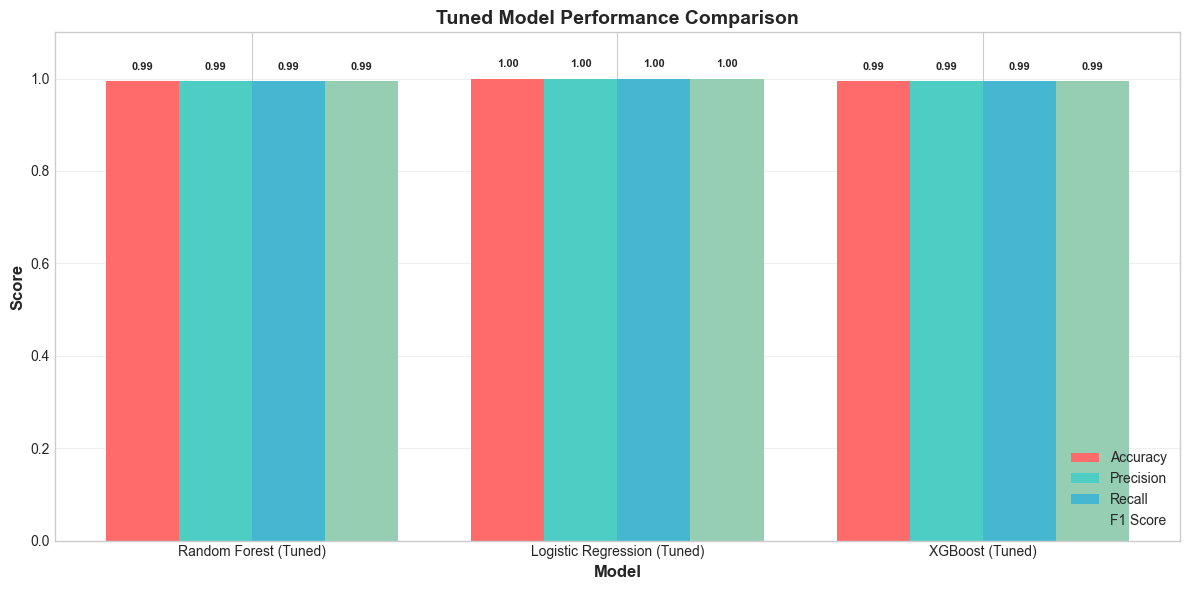

In [31]:
fig, ax = plt.subplots(figsize=(12, 6))

x = np.arange(len(final_results))
width = 0.2

bars1 = ax.bar(x - 1.5*width, final_results['Accuracy'], width, label='Accuracy', color='#FF6B6B')
bars2 = ax.bar(x - 0.5*width, final_results['Precision'], width, label='Precision', color='#4ECDC4')
bars3 = ax.bar(x + 0.5*width, final_results['Recall'], width, label='Recall', color='#45B7D1')
bars4 = ax.bar(x + 1.5*width, final_results['F1 Score'], width, label='F1 Score', color='#96CEB4')

ax.set_ylabel('Score', fontsize=12, fontweight='bold')
ax.set_xlabel('Model', fontsize=12, fontweight='bold')
ax.set_title('Tuned Model Performance Comparison', fontsize=14, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(final_results['Model'], fontsize=10)
ax.legend(loc='lower right')
ax.set_ylim(0, 1.1)
ax.grid(True, alpha=0.3, axis='y')

for bars in [bars1, bars2, bars3, bars4]:
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height + 0.02,
                f'{height:.2f}', ha='center', va='bottom', fontsize=8, fontweight='bold')

plt.tight_layout()
plt.show()

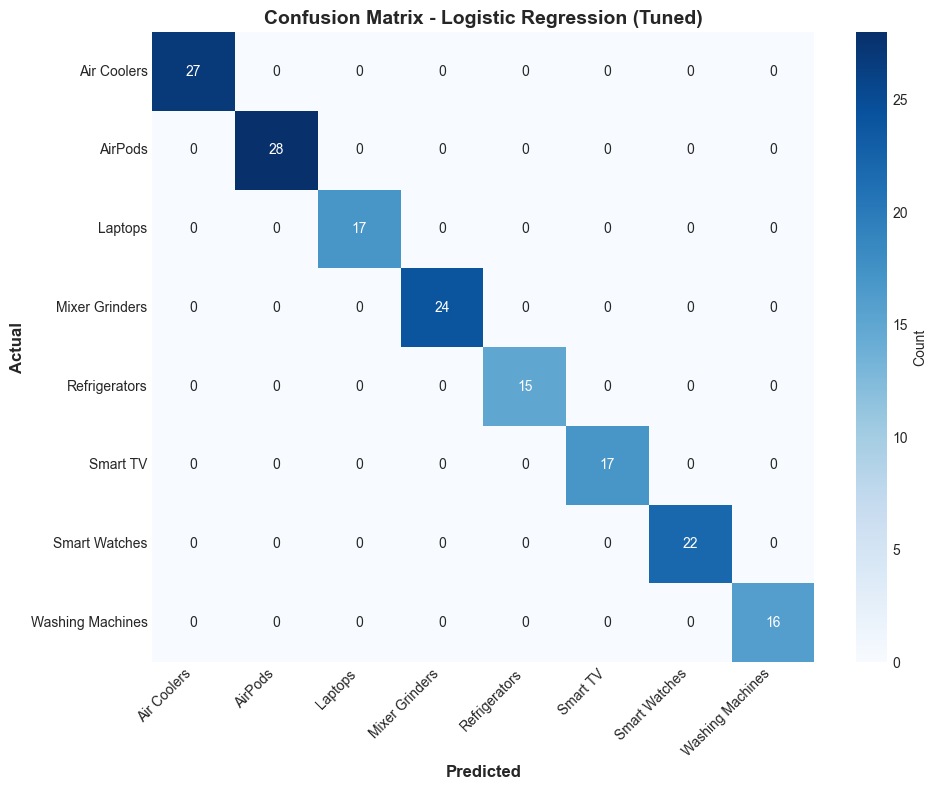

In [32]:
best_model_idx = final_results['F1 Score'].idxmax()
best_model_name = final_results.loc[best_model_idx, 'Model']

if 'Random Forest' in best_model_name:
    y_pred_best = y_pred_rf
elif 'Logistic' in best_model_name:
    y_pred_best = y_pred_lr
else:
    y_pred_best = y_pred_xgb

cm = confusion_matrix(y_test, y_pred_best)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=le.classes_, yticklabels=le.classes_,
            cbar_kws={'label': 'Count'})
plt.title(f'Confusion Matrix - {best_model_name}', fontsize=14, fontweight='bold')
plt.xlabel('Predicted', fontsize=12, fontweight='bold')
plt.ylabel('Actual', fontsize=12, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()
     

In [33]:
print("\n" + "="*70)
print(f"CLASSIFICATION REPORT - {best_model_name}")
print("="*70)
print(classification_report(y_test, y_pred_best, target_names=le.classes_))
     


CLASSIFICATION REPORT - Logistic Regression (Tuned)
                  precision    recall  f1-score   support

     Air Coolers       1.00      1.00      1.00        27
         AirPods       1.00      1.00      1.00        28
         Laptops       1.00      1.00      1.00        17
  Mixer Grinders       1.00      1.00      1.00        24
   Refrigerators       1.00      1.00      1.00        15
        Smart TV       1.00      1.00      1.00        17
   Smart Watches       1.00      1.00      1.00        22
Washing Machines       1.00      1.00      1.00        16

        accuracy                           1.00       166
       macro avg       1.00      1.00      1.00       166
    weighted avg       1.00      1.00      1.00       166



In [34]:
print("\n" + "="*70)
print("MACHINE LEARNING ANALYSIS COMPLETED SUCCESSFULLY!")
print("="*70)
print(f"\nBest Performing Model: {best_model_name}")
print(f"Best F1 Score: {final_results.loc[best_model_idx, 'F1 Score']:.4f}")


MACHINE LEARNING ANALYSIS COMPLETED SUCCESSFULLY!

Best Performing Model: Logistic Regression (Tuned)
Best F1 Score: 1.0000
